# custom classification problem

## imports

In [140]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## data
The data we're trying to classify will consist of 2 datasets. One will be a small square centered at 0, 0. The other will consist of a border surrouding the inner square.

In [133]:
class1_size = 500
class1_radius = 3
class2_size = 500

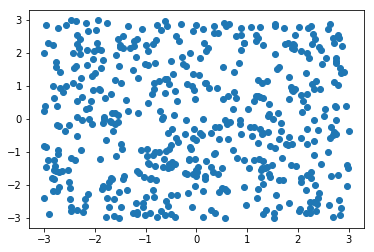

In [134]:
features1 = np.random.uniform(low=-class1_radius, high=class1_radius, size=(class1_size, 2))
plt.plot(features1[:,0], features1[:,1], "o")

In [135]:
def get_features2(num_points=10, point_lim=100, top_left=[-1, 1], bottom_right=[-1, 1]):
    """
    Attempts to get num_points random data points that exist
    outside of the box described by top_left, bottom_right. The
    function will continue until num_points have been acquired or
    until point_lim has been reached. If point_lim is reached,
    the data points acquired so far will be returned.
    :param num_points: Desired number of data points
    :param point_lim: Desired stopping criteria for total points
        (including invalid points) generated
    :param top_left: Describes the top_left of the inner box in
        [] indexable form
    :param top_right: Describes the top_right of the inner box in
        [] indexable form
    """
    #outer bounds for data array
    top_left_bound = [e * 2 for e in top_left]
    bottom_right_bound = [e * 2 for e in bottom_right]
    max_x = np.max([np.abs(top_left_bound[0]), np.abs(bottom_right_bound[0])])
    max_y = np.max([np.abs(top_left_bound[1]), np.abs(bottom_right_bound[1])])
    print(top_left, bottom_right)
    print(top_left_bound, bottom_right_bound)
    print(max_x, max_y)
    #inner bounds are described by top_left and bottom_right
    
    points = []
    #collect points
    for i in range(point_lim):
        px = np.random.uniform(low=-max_x, high=max_x)
        py = np.random.uniform(low=-max_y, high=max_y)
        
        #check if point valid
        valid_x = px < top_left[0] or bottom_right[0] < px
        valid_y = top_left[1] < py or py < bottom_right[1]
        if valid_x or valid_y:
            points.append([px, py])
        
        #check if enough points
        if len(points) == num_points:
            break
    return np.asarray(points)

[-3, 3] [3, -3]
[-6, 6] [6, -6]
6 6


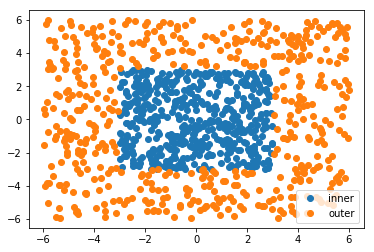

In [136]:
features2 = get_features2(
    num_points=class2_size,
    point_lim=2*class2_size,
    top_left=[-class1_radius, class1_radius],
    bottom_right=[class1_radius, -class1_radius]
)
plt.plot(features1[:,0], features1[:,1], "o", label="inner")
plt.plot(features2[:,0], features2[:,1], "o", label="outer")
plt.legend()

### dataframe-izing
We'll now attach the data into a pandas dataframe.

In [137]:
df1 = pd.DataFrame(features1, columns=["x", "y"])
df1["label"] = 0
df1.head(3)

,x,y,label
0,2.018087,2.778710,0
1,1.896394,0.838430,0
2,0.622010,0.698046,0


In [138]:
df2 = pd.DataFrame(features2, columns=["x", "y"])
df2["label"] = 1
df2.head(3)

,x,y,label
0,0.329932,-3.258074,1
1,-0.941108,4.130960,1
2,-0.233279,-5.125008,1


In [139]:
df = pd.concat([df1, df2], axis=0)
df.sample(n=6)

,x,y,label
379,-3.664590,0.311656,1
253,2.639018,2.877039,0
296,-3.952611,-0.703696,1
149,2.465584,-1.366778,0
174,-0.947096,-1.340927,0
496,1.992551,-3.289722,1


## scaling data
We'll scale the features below using a min-max scaler.

In [148]:
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df[df.columns[:-1]]), columns=["x", "y"])
df_scaled["label"] = df["label"]
# df_scaled.sample(6)

ValueError: cannot reindex from a duplicate axis

In [149]:
df_scaled[df.index.duplicated()]

,x,y
500,0.526900,0.225174
501,0.420560,0.844487
502,0.479779,0.068696
503,0.048082,0.168370
504,0.818198,0.820952
505,0.903635,0.264069
506,0.034077,0.864009
507,0.061515,0.797825
508,0.755590,0.323840
509,0.731794,0.870125
